DATA PREPROCESSING AND DATA AUGMENTATION.

Here we Will do data preprocessing

Perform Exploratory Data Analysis

Splitting Data into Train, Test and Validation

Data Augmentation on the Training Data

In [38]:
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from sklearn.model_selection import train_test_split

Accessing Data from Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Step 2: Define the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/flower_photos.tgz'  # Replace with your actual path

In [6]:
# Step 3: Unzip the .tgz file
import tarfile

In [7]:
# Open the .tgz file using tarfile
with tarfile.open(zip_file_path, 'r:gz') as tar:
    # Extract all contents to the desired directory (e.g., "/content/")
    tar.extractall('/content/')


In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the directory path where the images are stored
image_dir = '/content/flower_photos/'  # Change this to the actual path

# List all image files in the directory
image_files = os.listdir(image_dir)



In [9]:
image_files

['sunflowers', 'daisy', 'LICENSE.txt', 'dandelion', 'tulips', 'roses']

Loading Tha Data

In [11]:
from PIL import Image
import glob
import os

# Define the directory path where the images are stored
image_dir = '/content/flower_photos/'  # Change this to the actual path

# Use glob to get a list of all image file paths in the 'photos' folder and its subfolders
image_file_paths = glob.glob(os.path.join(image_dir, '**', '*.jpg'), recursive=True)
# Change '*.jpg' to the appropriate file extension if your images have a different format.

# Load images into a list
images = []
for file_path in image_file_paths:
    with Image.open(file_path) as img:
        images.append(img.copy())  # Use img.copy() to prevent issues with the context manager

# Now the images list contains all the images properly loaded and closed.


In [12]:
images

[<PIL.Image.Image image mode=RGB size=180x240 at 0x784B59EFEC20>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x784B59EFE2F0>,
 <PIL.Image.Image image mode=RGB size=180x240 at 0x784B59EFF220>,
 <PIL.Image.Image image mode=RGB size=320x214 at 0x784B59EFE3E0>,
 <PIL.Image.Image image mode=RGB size=500x331 at 0x784B59EFE2C0>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x784B592A34F0>,
 <PIL.Image.Image image mode=RGB size=500x343 at 0x784B592A3580>,
 <PIL.Image.Image image mode=RGB size=320x239 at 0x784B592A3490>,
 <PIL.Image.Image image mode=RGB size=500x334 at 0x784B592A3520>,
 <PIL.Image.Image image mode=RGB size=240x217 at 0x784B592A35E0>,
 <PIL.Image.Image image mode=RGB size=240x238 at 0x784B592A3610>,
 <PIL.Image.Image image mode=RGB size=500x375 at 0x784B592A3640>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x784B592A3670>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x784B592A36A0>,
 <PIL.Image.Image image mode=RGB size=500x332 at 0x784B592A36D0>,
 <PIL.Imag

Loading Images, Labels and Class names from the subfolders in the directory

In [13]:


def get_data(image_dir):
    # Use glob to get a list of all image file paths in the 'photos' folder and its subfolders
    image_file_paths = glob.glob(os.path.join(image_dir, '**', '*.jpg'), recursive=True)
    # Change '*.jpg' to the appropriate file extension if your images have a different format.

    # Load images and labels into lists
    images = []
    labels = []
    class_names = []  # To keep track of the class names (folder names)

    for file_path in image_file_paths:
        img = Image.open(file_path)
        images.append(img)

        # Extract the label from the file path
        class_name = os.path.basename(os.path.dirname(file_path))
        if class_name not in class_names:
            class_names.append(class_name)

        # Assign an integer label to each class (folder)
        label = class_names.index(class_name)
        labels.append(label)

    return images, labels, class_names

# Define the path to the 'photos' folder on the E drive
#photos_folder = r'E:\Bicocca\Found Deep Learning\Project\FlowerDataset\flower_photos'

# Load and preprocess the image data
images, labels, class_names = get_data(image_dir)

# Now you have the 'images' list containing the images and the 'labels' list containing the corresponding integer labels.
# The 'class_names' list contains the names of the classes (folder names) and can be useful for reference.


In [14]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x240 at 0x784B59EFFB80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240 at 0x784B59EFFC10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x240 at 0x784B58E76920>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x214 at 0x784B58E768C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331 at 0x784B58E76890>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240 at 0x784B58E76830>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x343 at 0x784B58E748B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x239 at 0x784B58E74A00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x784B58E74A60>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x217 at 0x784B58E74A90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x238 at 0x784B58E74D00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x784B58E

In [16]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [15]:
class_names

['sunflowers', 'daisy', 'dandelion', 'tulips', 'roses']

Displaying Few Images from the images folder

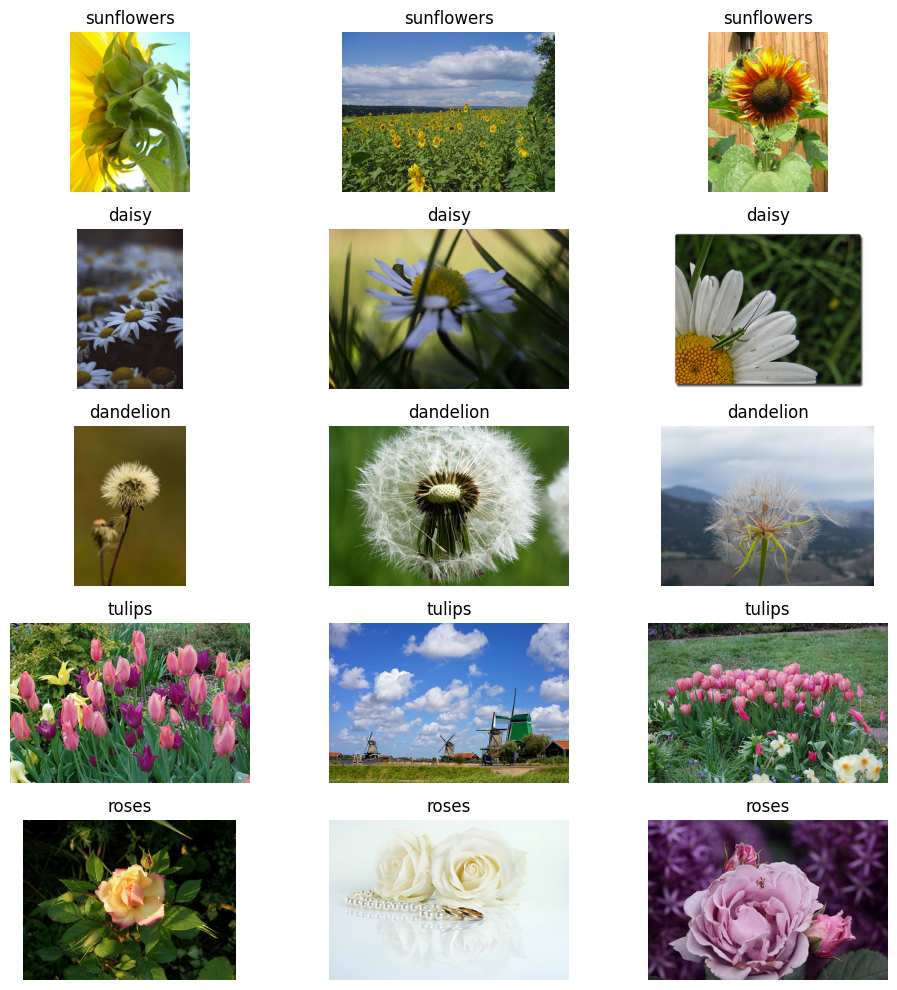

In [17]:
import matplotlib.pyplot as plt

# Visualize some sample images from different classes
num_classes = len(class_names)
num_samples_per_class = 3  # Number of samples to display for each  class

plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_names):
    # Find the indexes of images belonging to the current class
    class_indexes = [j for j, label in enumerate(labels) if label == i]

    # Display a few samples from the current class
    for j in range(num_samples_per_class):
        index = class_indexes[j]
        img = images[index]
        plt.subplot(num_classes, num_samples_per_class, i * num_samples_per_class + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


Total number of Images and their class distribution

In [19]:
# Assuming you already have the 'images', 'labels', and 'class_names' variables from the previous code

# Evaluate class and count of images
class_count = {}
total_images = len(images)

for label, class_name in enumerate(class_names):
    class_count[class_name] = labels.count(label)

# Print the results
print("Total number of images:", total_images)
print("Class-wise image counts:")
for class_name, count in class_count.items():
    print(f"{class_name}: {count} images")


Total number of images: 3670
Class-wise image counts:
sunflowers: 699 images
daisy: 633 images
dandelion: 898 images
tulips: 799 images
roses: 641 images


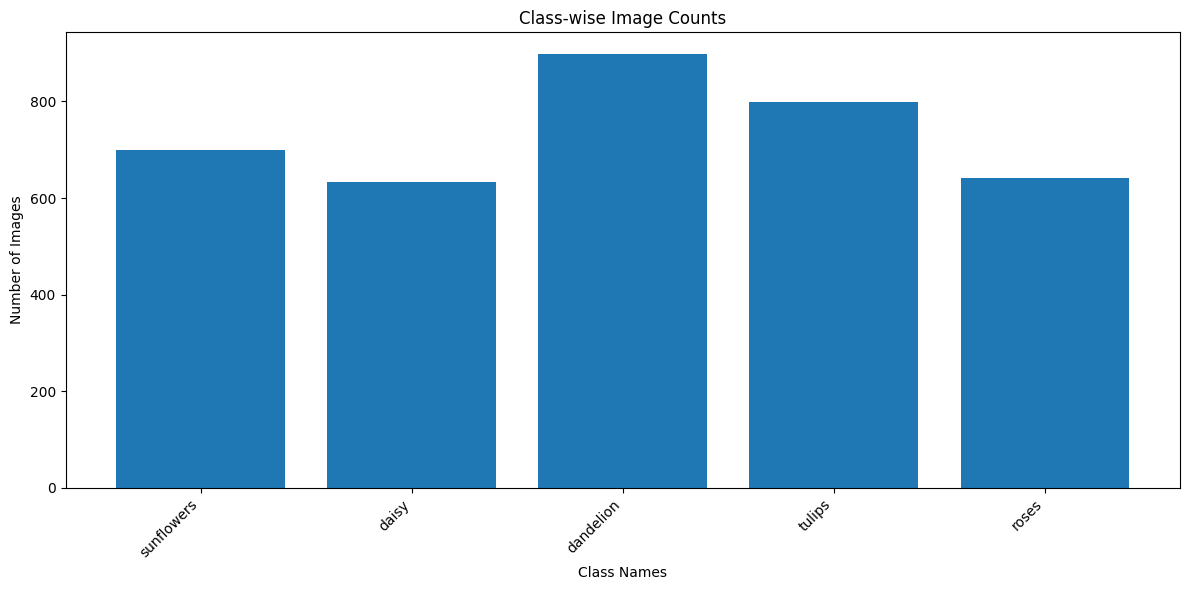

In [20]:
# Plot the class-wise image counts
plt.figure(figsize=(12, 6))
plt.bar(class_count.keys(), class_count.values())
plt.xlabel("Class Names")
plt.ylabel("Number of Images")
plt.title("Class-wise Image Counts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Recizing Images and Storing labels and Images into a numpy array

In [22]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Define the directory path where the images are stored
image_dir = '/content/flower_photos/'  # Change this to the actual path

# Load and preprocess the image data
def preprocess_images(folder_path, image_size=(224, 224)):
    images = []
    labels = []
    class_names = []

    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            for image_file in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_file)
                img = Image.open(image_path)
                img = img.resize(image_size)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(class_name)
                if class_name not in class_names:
                    class_names.append(class_name)

    # Convert the labels to numerical values using LabelEncoder
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(labels)
    y = np.array(Y)

    # Convert the list of images to a NumPy array
    X = np.array(images)

    return X, y, class_names

# Load and preprocess the images and labels
X, y, class_names = preprocess_images(image_dir)

# Verify the shape of X and Y
print("Shape of X:", X.shape)  # (num_samples, 180, 180, 3) for RGB images
print("Shape of Y:", y.shape)  # (num_samples,) representing the labels as numerical values
print("Class names:", class_names)  # List of class names (folder names)

# Now, you can use X and Y as input data and target data for your model.
# The images have been resized to 180x180, and Y contains the labels represented as numerical values.


Shape of X: (3670, 224, 224, 3)
Shape of Y: (3670,)
Class names: ['sunflowers', 'daisy', 'dandelion', 'tulips', 'roses']


Load and preprocess the images and labels

In [27]:
X, y, class_names = preprocess_images(image_dir)

Create the new directory:

In [24]:
output_dir = '/content/drive/MyDrive/preprocessedXY'
os.makedirs(output_dir, exist_ok=True)

In [25]:
np.save(os.path.join(output_dir, 'X.npy'), X)
np.save(os.path.join(output_dir, 'y.npy'), y)

# Save class_names to a text file
class_names_file = os.path.join(output_dir, 'class_names.txt')
with open(class_names_file, 'w') as f:
    for name in class_names:
        f.write(f"{name}\n")


output directory

In [26]:
print("Data saved in:", output_dir)


Data saved in: /content/drive/MyDrive/preprocessedXY


Split the data into training, validation, and testing sets

In [29]:
from sklearn.model_selection import train_test_split

In [36]:
# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [32]:
# Define the output directory for train, test, and validation sets
output_dir = '/content/drive/MyDrive/TTV'
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
val_dir = os.path.join(output_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Save train data
for i in range(len(X_train)):
    class_name = class_names[y_train[i]]
    class_dir = os.path.join(train_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    img = Image.fromarray(X_train[i])
    img.save(os.path.join(class_dir, f"{i}.jpg"))

# Save test data
for i in range(len(X_test)):
    class_name = class_names[y_test[i]]
    class_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    img = Image.fromarray(X_test[i])
    img.save(os.path.join(class_dir, f"{i}.jpg"))

# Save validation data
for i in range(len(X_val)):
    class_name = class_names[y_val[i]]
    class_dir = os.path.join(val_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    img = Image.fromarray(X_val[i])
    img.save(os.path.join(class_dir, f"{i}.jpg"))

print("Data saved in Train, Test, and Validation directories.")


Data saved in Train, Test, and Validation directories.


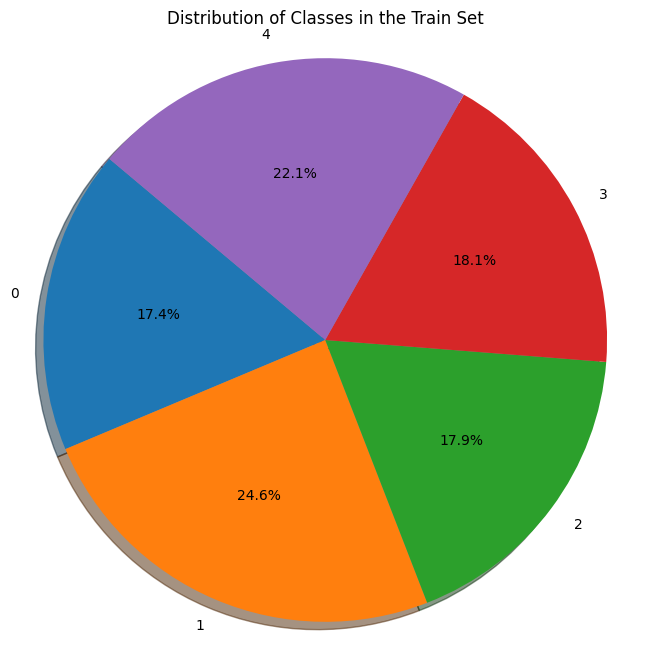

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train contains the target labels for the train set

# Count the occurrences of each class in the y_train dataset
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

plt.title('Distribution of Classes in the Train Set')
plt.show()

Data Augmentation on the train set </br>
Data augmentation is a technique used to artificially increase the size of a dataset by generating modified versions of existing data. In the field of machine learning and deep learning, this is often done to improve the performance of a model by providing it with more diverse data to learn from.


In [42]:
import tensorflow as tf
from keras import layers

# Assuming you have already loaded and preprocessed the training data (X_train, y_train)
# and defined the input shape (input_shape) based on your data

# Create a Sequential model for data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=x_train.shape[1:]),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    # layers.experimental.preprocessing.RandomContrast(0.2),  # Uncomment this line to add RandomContrast augmentation
    # layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Uncomment this line to add RandomTranslation augmentation
], name='data_augmentation')

# Applying data augmentation to the training data
augmented_X_train = data_augmentation(X_train)

# Now you can use augmented_X_train for training your model.


In [43]:
augmented_X_train

<tf.Tensor: shape=(2569, 224, 224, 3), dtype=float32, numpy=
array([[[[2.35159729e+02, 1.74943695e+02, 3.56955791e+00],
         [2.32430557e+02, 1.71406586e+02, 3.52700233e+00],
         [2.31131287e+02, 1.68737457e+02, 2.59037137e+00],
         ...,
         [9.92448196e+01, 1.33333664e+02, 7.29834747e+01],
         [9.01176758e+01, 1.25377853e+02, 7.10879822e+01],
         [7.42188034e+01, 1.08161095e+02, 6.11979866e+01]],

        [[2.40355789e+02, 1.77875229e+02, 3.72847295e+00],
         [2.38732391e+02, 1.75114029e+02, 4.86129427e+00],
         [2.36420715e+02, 1.72590225e+02, 4.38908958e+00],
         ...,
         [8.56687241e+01, 1.26818199e+02, 6.91315994e+01],
         [9.34767227e+01, 1.30472733e+02, 7.66474075e+01],
         [8.68154221e+01, 1.20061821e+02, 7.13634338e+01]],

        [[2.37312622e+02, 1.74954849e+02, 3.31178451e+00],
         [2.36136398e+02, 1.72668869e+02, 3.63847899e+00],
         [2.35598923e+02, 1.73226318e+02, 3.32551932e+00],
         ...,
        

Pushing augmented data into drive folder

In [45]:
# Mount your Google Drive to access it in Colab
drive.mount('/content/drive')

# Define the directory path to save the augmented data
image_dir = '/content/drive/MyDrive/AugmentedData'  # Change 'MyDrive' to the appropriate folder name in your Google Drive
os.makedirs(image_dir, exist_ok=True)

# Save the augmented training data to the specified directory
for i, img in enumerate(augmented_X_train):
    img_path = os.path.join(image_dir, f"augmented_{i}.jpg")
    tf.keras.preprocessing.image.save_img(img_path, img)

print("Augmented training data saved in:", image_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Augmented training data saved in: /content/drive/MyDrive/AugmentedData
